# Hate Crime Linear Regression

In [1]:
#important imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

/home/emonnier/.cache/pypoetry/virtualenvs/linear-regression-3GZDss1m-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Top 5 Rows

In [2]:
hate_crimes = pd.read_csv('./hate_crime.csv')
hate_crimes.head()

/home/emonnier/.cache/pypoetry/virtualenvs/linear-regression-3GZDss1m-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


## Info and Description

In [3]:
hate_crimes.describe()

,INCIDENT_ID,DATA_YEAR,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
count,201403.000000,201403.000000,35973.000000,35496.000000,201403.000000,33952.000000,33945.000000,201403.000000,199797.000000
mean,114148.940031,2004.200906,0.504656,0.064683,0.969112,0.422449,0.083046,1.245647,0.973568
std,97935.432601,7.804374,0.972267,0.396970,1.387487,0.770693,0.436144,1.153782,1.107456
min,2.000000,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,50352.500000,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,100703.000000,2004.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,151053.500000,2011.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,603113.000000,2018.000000,80.000000,40.000000,99.000000,30.000000,15.000000,200.000000,147.000000


In [4]:
hate_crimes.shape

(201403, 28)

In [5]:
hate_crimes.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [113]:
victim_count_by_year_race_group = hate_crimes.groupby(['DATA_YEAR', 'OFFENDER_RACE'])['VICTIM_COUNT'].sum()
victim_count_by_year_race = victim_count_by_year_race_group.to_frame().reset_index()

victim_count_by_white = victim_count_by_year_race.where(victim_count_by_year_race['OFFENDER_RACE'] == 'White').dropna().reset_index()
victim_count_by_black = victim_count_by_year_race.where(victim_count_by_year_race['OFFENDER_RACE'] == 'Black or African American').dropna().reset_index()
victim_count_by_native = victim_count_by_year_race.where(victim_count_by_year_race['OFFENDER_RACE'] == 'American Indian or Alaska Native').dropna().reset_index()
victim_count_by_islander = victim_count_by_year_race.where(victim_count_by_year_race['OFFENDER_RACE'] == 'Native Hawaiian or Other Pacific Islander').dropna().reset_index()
victim_count_by_asian = victim_count_by_year_race.where(victim_count_by_year_race['OFFENDER_RACE'] == 'Asian').dropna().reset_index()

data = [victim_count_by_white['DATA_YEAR'], victim_count_by_white['VICTIM_COUNT'], victim_count_by_black['VICTIM_COUNT'], victim_count_by_native['VICTIM_COUNT'], victim_count_by_asian['VICTIM_COUNT']]
headers = ['YEAR', 'WHITE', 'BLACK', 'NATIVE', 'ASIAN']
victim_counts_by_offender_race = pd.concat(data, axis=1, keys=headers).reset_index()

victim_counts_by_offender_race

,index,YEAR,WHITE,BLACK,NATIVE,ASIAN
0,0,1991.0,2317.0,999.0,17.0,61.0
1,1,1992.0,3422.0,1613.0,25.0,42.0
2,2,1993.0,3694.0,1655.0,41.0,63.0
3,3,1994.0,3008.0,1184.0,30.0,54.0
4,4,1995.0,4321.0,1473.0,46.0,119.0
5,5,1996.0,4999.0,1308.0,52.0,107.0
6,6,1997.0,4646.0,1194.0,58.0,94.0
7,7,1998.0,4242.0,1000.0,67.0,78.0
8,8,1999.0,4252.0,990.0,43.0,77.0
9,9,2000.0,4356.0,1062.0,45.0,83.0


## Linear Regression of Hate Crimes by Race per Year

In [83]:
y = victim_count_by_white['VICTIM_COUNT'].values
x = victim_count_by_white['DATA_YEAR'].values
x = x.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, test_size = 0.5, random_state = 100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (14, 1)
y_train shape (14,)
X_test shape (14, 1)
y_test shape (14,)
[4356. 3391. 3281. 3832. 4999. 3839. 2854. 3147. 4646. 3859. 3251. 4321.
 3678. 2317.]


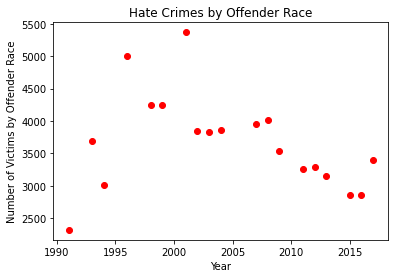

In [64]:
plt.scatter(x_train, y_train, color = 'red')
plt.xlabel('Year')
plt.ylabel('Number of Victims by Offender Race')
plt.title('Hate Crimes by Offender Race')
plt.show()

In [84]:
line = LinearRegression()
line.fit(x_train, y_train)
y_predict = line.predict(x_test)
print(f"Train accuracy {round(line.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(line.score(x_test,y_test)*100,2)} %")

Train accuracy 8.72 %
Test accuracy 14.86 %


[]

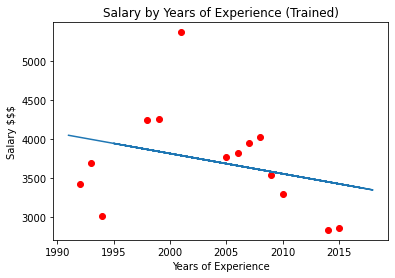

In [85]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, y_predict)
plt.xlabel('Years of Experience')
plt.ylabel('Salary $$$')
plt.title('Salary by Years of Experience (Trained)')
plt.plot()

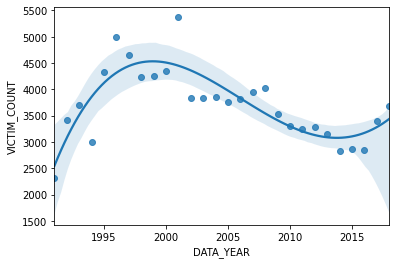

In [89]:
sns.regplot(x = 'DATA_YEAR', y = 'VICTIM_COUNT', data = victim_count_by_white, order = 4)

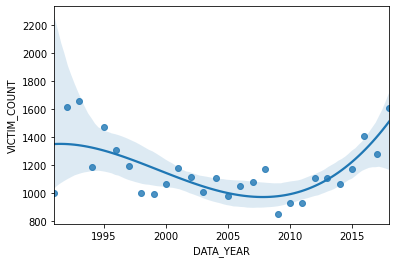

In [97]:
sns.regplot(x = 'DATA_YEAR', y = 'VICTIM_COUNT', data = victim_count_by_black, order = 4)

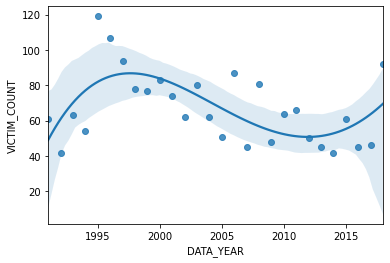

In [98]:
sns.regplot(x = 'DATA_YEAR', y = 'VICTIM_COUNT', data = victim_count_by_asian, order = 4)

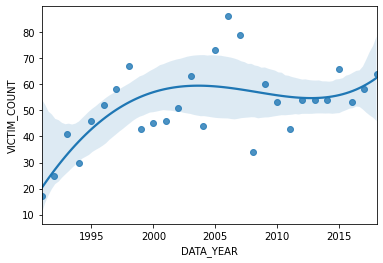

In [100]:
sns.regplot(x = 'DATA_YEAR', y = 'VICTIM_COUNT', data = victim_count_by_native, order = 4)

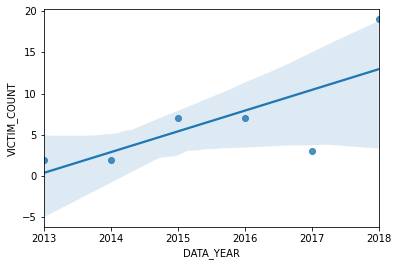

In [105]:
sns.regplot(x = 'DATA_YEAR', y = 'VICTIM_COUNT', data = victim_count_by_islander, order = 1)